In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings

2025-01-11 11:36:43.706411: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-11 11:36:43.727323: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-11 11:36:43.733705: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-11 11:36:43.749207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-11 11:36:45.713865: W tensorflow/compiler/tf2

# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,Nearest Neighbor (F1 score or RMSE),Random Forest (F1 score or RMSE),GRAE,Parameter STD
1600,RF-SPUD,diabetes,skewed,0.3,"{'knn': 82, 'OD_method': 'default', 'agg_metho...",{'42': 0.71484375},{'42': 0.0},{'42': 0.7231270358306189},{'42': 0.6818181818181818},{'42': 0.711038961038961},{'42': 0.7133572226493928},{'42': 0.6874533069655021},"{'42': {'RF-OOB': 0.7744299674267101, 'KNN': 0...",{}
1724,RF-NAMA,water_potability,skewed,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",{'42': 0.0044753853804077575},{'42': 3.38763355498018e-05},{'42': 0.009328358208955223},{'42': 0.0},{'42': 0.0},{'42': 0.0},{'42': 0.0},"{'42': {'RF-OOB': 0.008706467661691543, 'KNN':...",{}
277,NAMA,EnergyEfficiency,turn,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': -0.27532951711560694, '1738': -0.275329...","{'42': 1.6954210069444444e-06, '1738': 1.69542...","{'42': 0.8946410565405154, '1738': 0.899791700...","{'42': 0.9096149069718177, '1738': 0.917539552...","{'42': 0.8789454006285768, '1738': 0.875255385...","{'42': 0.35204556177531926, '1738': 0.35700831...","{'42': 0.30419819364918266, '1738': 0.29026205...","{'42': {'RF-OOB': 0.8841582738716701, 'KNN': 0...","{'OD_method': 0.008727404469571542, 'agg_metho..."
2020,RF-NAMA,seeds,random,0.3,"{'OD_method': 'absolute_distance', 'agg_method...","{'42': 0.7286432160804021, '1738': 0.175879396...","{'42': 0.0, '1738': 0.0, '5271': 0.0, '9209': ...","{'42': 0.6226415094339622, '1738': 0.591194968...","{'42': 0.475, '1738': 0.45, '5271': 0.55, '920...","{'42': 0.5875, '1738': 0.525, '5271': 0.6125, ...","{'42': 0.5940816326530612, '1738': 0.507231170...","{'42': 0.4696731909137924, '1738': 0.447926267...","{'42': {'RF-OOB': 0.8364779874213837, 'KNN': 0...",{}
2108,SPUD,titanic,even,0.3,"{'knn': 32, 'OD_method': 'default', 'agg_metho...",{'42': 0.6853932584269663},{'42': 0.04689867125362959},{'42': 0.7539543057996485},{'42': 0.6993006993006993},{'42': 0.7237762237762237},{'42': 0.7212190794280346},{'42': 0.6972175414946499},"{'42': {'RF-OOB': 0.7416520210896309, 'KNN': 0...","{'knn': 0.026545541613734732, 'OD_method': 0.0..."


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('RF-SPUD',
  'ComputerHardware',
  'even',
  {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'}),
 ('RF-MASH-',
  'ComputerHardware',
  'distort',
  {'knn': 2,
   'page_rank': 'full',
   'DTM': 'log',
   'density_normalization': False})]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('SPUD', 'iris', 'turn', {'knn': 10, 'OD_method': 'default', 'agg_method': 'log'})


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


240 300 300


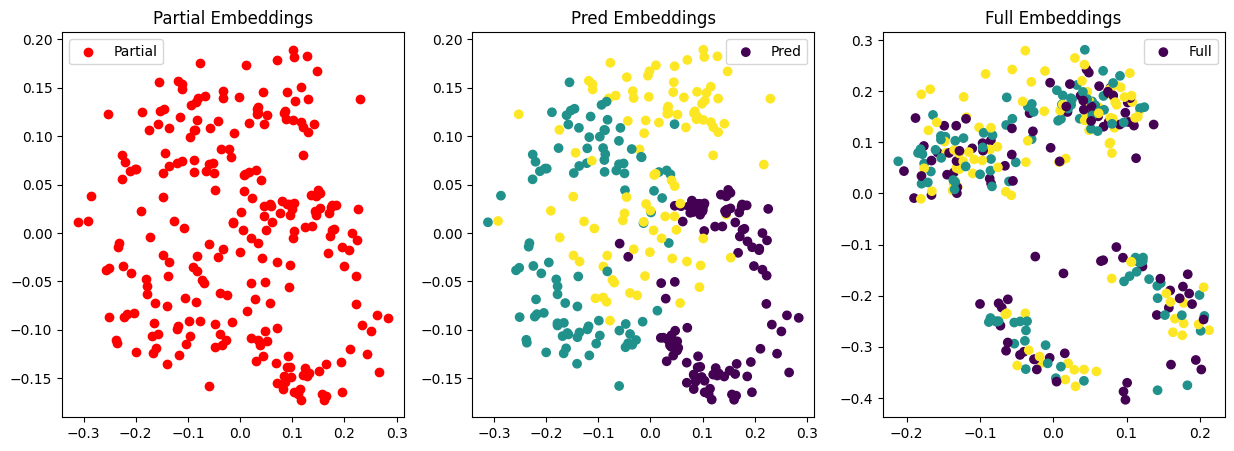

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

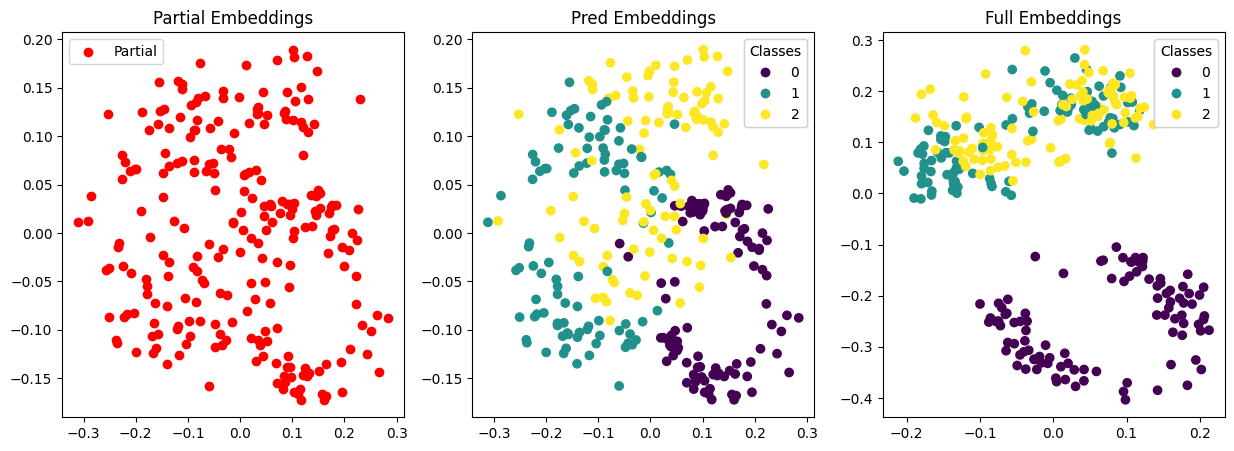

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...
('RF-SPUD', 'ComputerHardware', 'even', {'knn': 22, 'OD_method': 'default', 'agg_method': 'log'})


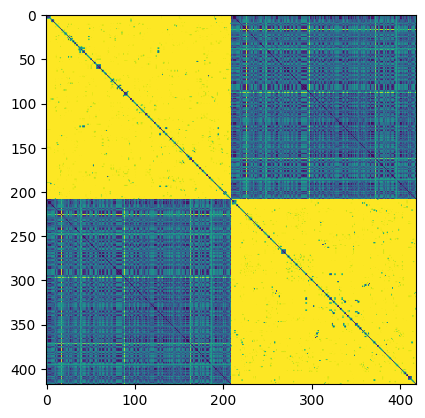

In [8]:
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
print(tasks[0])
plt.imshow(block_full)

# Marshall's Tests here?

# Marshall's Vizualizations Here?